# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

Question 1:
1.1:

1.2:


<ipython-input-120-91577c10fc61>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1['Price'], shade = True)


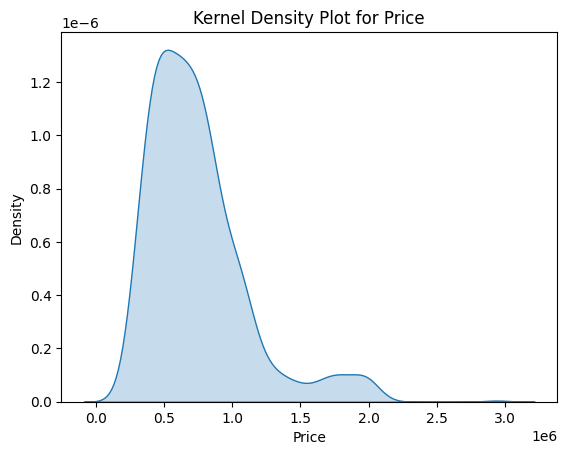

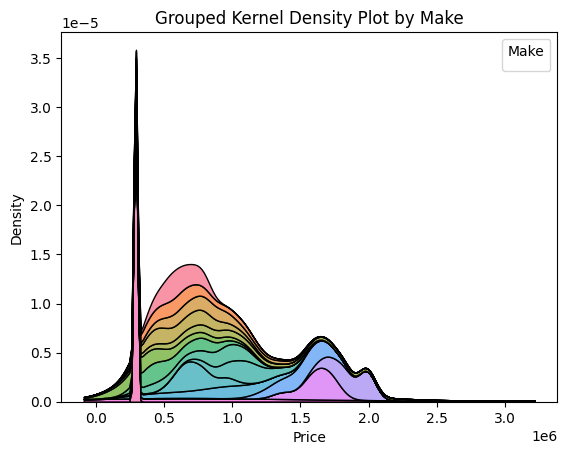

The most expensive make is 'MG Motors' with an average price of $1869457.14.
The mean price of a cars is $741019.47, making it the general price point.

1.3:

1.4:
Numeric R-squared:0.2921156286318457
Numeric Root mean squared error:284940.5895774058

Categorical R-squared:0.8196717007174037
Categorical Root mean squared error:143815.3027671896

Combined R-squared:0.8196717007235523
Combined Root mean squared error:143815.30276473775

The model that performs the best between numeric and categorical one is the categorical one, as it has a higher R-squared value.
In contrast, the joint model performs practically the same as the categorical model, with a nearly identical R-squared value.

1.5:
Degree 1: R-squared (R2): 0.8197, RMSE: 143815.30
Degree 2: R-squared (R2): -64.5931, RMSE: 2742850.87

As the degree of expansion increase, R-squared decreases.
R-squared goes negative at degree 2.
For the best model with expanded features, R-squared is 0.8197 and RMSE is 143815.30. These values ar

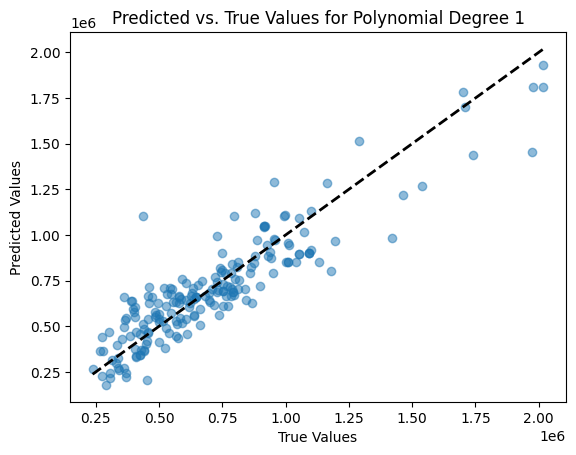

<ipython-input-120-91577c10fc61>:137: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals_poly, shade=True)


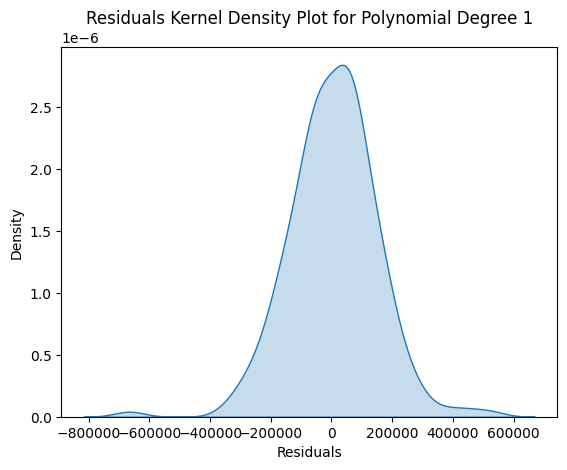

The predicted values and the true values do roughly line up along the diagonal.
The residuals do look roughly bell-shaped around zero.

The strengths of the model are that it that it provides comprehensive and expansive analysis of the data, conduting multiple analytical processes of both numeric and categorical variables.
The weakness of the model is its complexity, as it presents information in a not-so-digestable fashion, making it harder for viewers to interpret.

1.7:
Max Depth 1: R-squared: 0.2965014008678214, RMSE: 284056.5283981426
Max Depth 2: R-squared: 0.5468832455279129, RMSE: 227970.27179370928
Max Depth 3: R-squared: 0.7242294047388931, RMSE: 177847.24205432727
Max Depth 4: R-squared: 0.7356467458623734, RMSE: 174126.7471020204
Max Depth 5: R-squared: 0.7539681612975997, RMSE: 167984.34591157726
Max Depth 6: R-squared: 0.7838076246416994, RMSE: 157468.37404063123
Max Depth 7: R-squared: 0.8066110195312279, RMSE: 148932.3418252753
Max Depth 8: R-squared: 0.8273675672166044

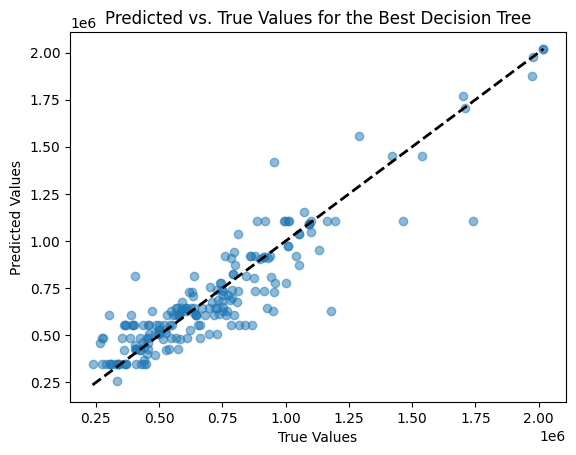

<ipython-input-120-91577c10fc61>:191: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals_best_tree, shade=True)


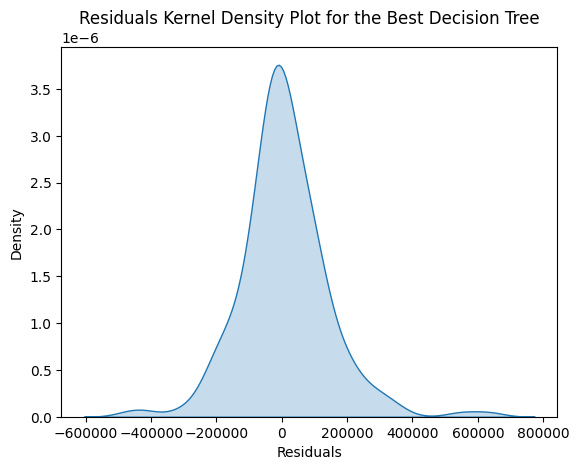

The predicted values and the true values do roughly line up along the diagonal.
The residuals do look roughly bell-shaped around zero.

1.9:
The decision tree regressor has a better R-squared performance on the test set and a lower RMSE on the test set, making it an overall better model.

Works Cited: https://chat.openai.com/


In [120]:
print("Question 1:")

print("1.1:")
import pandas as pd
import numpy as np
df1 = pd.read_csv('cars_hw.csv')

no_owner_mapping = {'1st': 1, '2nd': 2, '3rd': 3}
df1['No_of_Owners'] = df1['No_of_Owners'].replace(no_owner_mapping)
df1 = df1.iloc[:, 1:]

print("\n1.2:")
import seaborn as sns
import matplotlib.pyplot as plt

price_summary = df1['Price'].describe()
plt.figure()
sns.kdeplot(df1['Price'], shade = True)
plt.title('Kernel Density Plot for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

price_by_make = df1.groupby('Make')['Price'].describe()
plt.figure()
sns.kdeplot(data = df1, x = 'Price', hue = 'Make', common_norm = False, multiple = 'stack', fill = True)
plt.title('Grouped Kernel Density Plot by Make')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title = 'Make', loc = 'upper right')
plt.show()

average_price_by_make = df1.groupby('Make')['Price'].mean()

most_expensive_make = average_price_by_make.idxmax()
highest_average_price = average_price_by_make.max()
rounded_average_price = round(highest_average_price, 2)
mean_price_all_cars = df1['Price'].mean()
rounded_mean_price = round(mean_price_all_cars, 2)

print(f"The most expensive make is '{most_expensive_make}' with an average price of ${rounded_average_price}.")
print(f"The mean price of a cars is ${rounded_mean_price}, making it the general price point.")

print("\n1.3:")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train_set, test_set = train_test_split(df1, test_size = 0.2, random_state = 42)

print("\n1.4:")
numeric_variables = ['Make_Year', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity']
X_numeric = df1[numeric_variables]
y = df1['Price']
X_train_numeric, X_test_numeric, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)
model_numeric = LinearRegression()
model_numeric.fit(X_train_numeric, y_train)
y_pred_numeric = model_numeric.predict(X_test_numeric)
r2_numeric = r2_score(y_test, y_pred_numeric)
rmse_numeric = np.sqrt(mean_squared_error(y_test, y_pred_numeric))
print("Numeric R-squared:" + str(r2_numeric))
print("Numeric Root mean squared error:" + str(rmse_numeric))

categorical_columns = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
df1_encoded = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)
X_categorical = df1_encoded.drop(columns=['Price'])
X_train_categorical, X_test_categorical, y_train, y_test = train_test_split(X_categorical, y, test_size=0.2, random_state=42)
model_categorical = LinearRegression()
model_categorical.fit(X_train_categorical, y_train)
y_pred_categorical = model_categorical.predict(X_test_categorical)
r2_categorical = r2_score(y_test, y_pred_categorical)
rmse_categorical = np.sqrt(mean_squared_error(y_test, y_pred_categorical))
print("\nCategorical R-squared:" + str(r2_categorical))
print("Categorical Root mean squared error:" + str(rmse_categorical))

X_combined = pd.concat([X_numeric, X_categorical], axis=1)
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train)
y_pred_combined = model_combined.predict(X_test_combined)
r2_combined = r2_score(y_test, y_pred_combined)
rmse_combined = np.sqrt(mean_squared_error(y_test, y_pred_combined))
print("\nCombined R-squared:" + str(r2_combined))
print("Combined Root mean squared error:" + str(rmse_combined))

print("\nThe model that performs the best between numeric and categorical one is the categorical one, as it has a higher R-squared value.")
print("In contrast, the joint model performs practically the same as the categorical model, with a nearly identical R-squared value.")

print("\n1.5:")

from sklearn.preprocessing import PolynomialFeatures

degrees = range(1, 3)
r2_scores = []
rmse_values = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_categorical)
    X_test_poly = poly.transform(X_test_categorical)
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    y_pred_poly = model_poly.predict(X_test_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
    r2_scores.append(r2_poly)
    rmse_values.append(rmse_poly)
    print(f"Degree {degree}: R-squared (R2): {r2_poly:.4f}, RMSE: {rmse_poly:.2f}")

print("\nAs the degree of expansion increase, R-squared decreases.")

negative_r2_degree = None
for i, r2_score in enumerate(r2_scores):
    if r2_score < 0:
        negative_r2_degree = degrees[i]
        break
print(f"R-squared goes negative at degree {negative_r2_degree}.")
print("For the best model with expanded features, R-squared is 0.8197 and RMSE is 143815.30. These values are nearly the same as the best model from the previous question.")

print("\n1.6:")
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(PolynomialFeatures(1), LinearRegression())
poly_reg.fit(X_train_combined, y_train)
y_pred_poly = poly_reg.predict(X_test_combined)
plt.figure()
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.title(f"Predicted vs. True Values for Polynomial Degree {1}")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

residuals_poly = y_test - y_pred_poly

plt.figure()
sns.kdeplot(residuals_poly, shade=True)
plt.title(f"Residuals Kernel Density Plot for Polynomial Degree {1}")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

print("The predicted values and the true values do roughly line up along the diagonal.")
print("The residuals do look roughly bell-shaped around zero.")

print("\nThe strengths of the model are that it that it provides comprehensive and expansive analysis of the data, conduting multiple analytical processes of both numeric and categorical variables.")
print("The weakness of the model is its complexity, as it presents information in a not-so-digestable fashion, making it harder for viewers to interpret.")

print("\n1.7:")

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

depth_range = range(1, 16)
r2_scores = []
rmse_scores = []

for depth in depth_range:
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_train_combined, y_train)
    y_pred_tree = tree_reg.predict(X_test_combined)
    r2_tree_result = r2_score(y_test, y_pred_tree)
    rmse_tree_result = np.sqrt(mean_squared_error(y_test, y_pred_tree))
    r2_scores.append(r2_tree_result)
    rmse_scores.append(rmse_tree_result)

    print(f"Max Depth {depth}: R-squared: {r2_tree_result}, RMSE: {rmse_tree_result}")

best_depth_index = np.argmax(r2_scores)
best_depth = depth_range[best_depth_index]

print(f"\nThe best results are obtained with a max depth of {best_depth}, with an R-squared of {r2_scores[best_depth_index]} and a RMSE of {rmse_scores[best_depth_index]}.")

print("\n1.8:")

best_tree = DecisionTreeRegressor(max_depth=9, random_state=42)
best_tree.fit(X_train_combined, y_train)
y_pred_best_tree = best_tree.predict(X_test_combined)

plt.figure()
plt.scatter(y_test, y_pred_best_tree, alpha=0.5)
plt.title("Predicted vs. True Values for the Best Decision Tree")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

residuals_best_tree = y_test - y_pred_best_tree

plt.figure()
sns.kdeplot(residuals_best_tree, shade=True)
plt.title("Residuals Kernel Density Plot for the Best Decision Tree")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

print("The predicted values and the true values do roughly line up along the diagonal.")
print("The residuals do look roughly bell-shaped around zero.")

print("\n1.9:")

print("The decision tree regressor has a better R-squared performance on the test set and a lower RMSE on the test set, making it an overall better model.")

print("\nWorks Cited: https://chat.openai.com/")

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

Question 3:
3.1:

Method counts:
1    629
3    511
2    333
Name: method, dtype: int64

Cross-tabulation of method and numberChildren:
numberChildren  0    1    2    3   4   5   6   7   8   9   10  11  12  13  16
method                                                                       
1               95  143  114   70  57  44  35  18  29   5   9   6   4   0   0
2                0   46   56   70  62  36  27  19   9   3   2   2   0   1   0
3                2   87  106  119  78  55  30  12   9   8   0   3   0   1   1

Total number of children:
No Contraception: 629
With Contraception: 844

Average number of children:
No Contraception: 2.93
With Contraception: 3.50

Couples who use contraception tend to have more children, as they have higher total number of children and a higher average than couples who do not use contraception.

3.2:

3.3:
Terminal nodes values:
[ 5  1  9  1  1  4  4  1  1  1  5  5  4  1 10  5  5  5  1  7  1  4  4  1
  7  7  5  4  7  1  9  7  4  4  5  5 10  5  1 10 

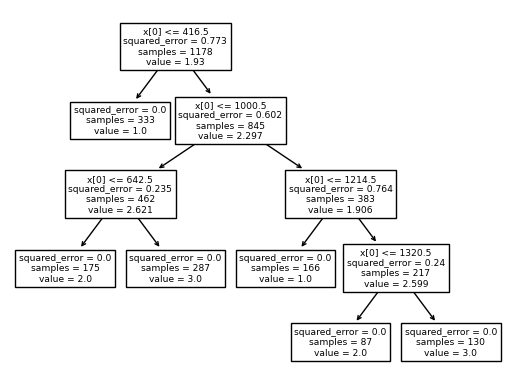

Using a regression tree for the method variable is incorrect because this variable is catergorical. Regression trees are designed for predicting continuous values, making continuous predictions might not align with categorical data.

3.4:
Classification tree:


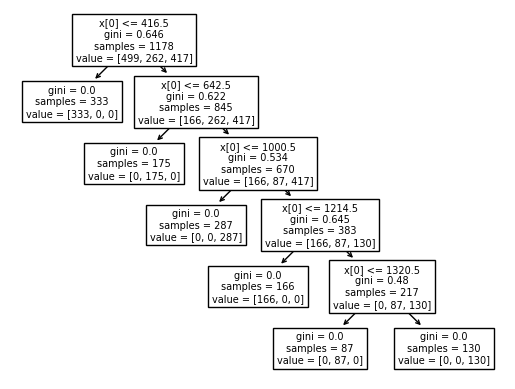

For a classification tree, terminal nodes represent a predicted class, with each terminal node being assigned to a specific contraceptive method. Additionally, its splitting criteria is based on metrics like Gini impurity/entropy, which are suitable for categorical outcomes, aligning with the classification tree.
n/3.5

Overall Accuracy: 99.66%
Confusion Matrix:
[[130   0   0]
 [  1  70   0]
 [  0   0  94]]

Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       130
           2       1.00      0.99      0.99        71
           3       1.00      1.00      1.00        94

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295

n/3.6
You cannot use a linear probability model to do this exercise because it is used particularly used for binary classification problems, making its functionality limited, specially

In [121]:
print("Question 3:")

print("3.1:")
import pandas as pd

df2 = pd.read_csv('contraception_hw.csv')

method_counts = df2['method'].value_counts()
print("\nMethod counts:")
print(method_counts)

cross_tabulation = pd.crosstab(df2['method'], df2['numberChildren'])
print("\nCross-tabulation of method and numberChildren:")
print(cross_tabulation)

total_children_no_contraception = cross_tabulation.loc[1].sum()
total_children_contraception = cross_tabulation.loc[2:3].sum().sum()

print("\nTotal number of children:")
print(f"No Contraception: {total_children_no_contraception}")
print(f"With Contraception: {total_children_contraception}")

average_children_no_contraception = (cross_tabulation.loc[1] * cross_tabulation.columns).sum() / cross_tabulation.loc[1].sum()
average_children_contraception = (cross_tabulation.loc[2:3] * cross_tabulation.columns).sum().sum() / cross_tabulation.loc[2:3].sum().sum()

print("\nAverage number of children:")
print(f"No Contraception: {average_children_no_contraception:.2f}")
print(f"With Contraception: {average_children_contraception:.2f}")

print("\nCouples who use contraception tend to have more children, as they have higher total number of children and a higher average than couples who do not use contraception.")

print("\n3.2:")
from sklearn.model_selection import train_test_split

X = df2.drop('method', axis=1)
y = df2['method']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n3.3:")
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

model_tree_reg = DecisionTreeRegressor(random_state=42)
model_tree_reg.fit(X_train, y_train)
terminal_nodes_values = model_tree_reg.apply(X_test)

print("Terminal nodes values:")
print(terminal_nodes_values)

print("\nRegression tree:")
plt.figure()
plot_tree(model_tree_reg)
plt.show()

print("Using a regression tree for the method variable is incorrect because this variable is catergorical. Regression trees are designed for predicting continuous values, making continuous predictions might not align with categorical data.")

print("\n3.4:")
from sklearn.tree import DecisionTreeClassifier, plot_tree

print("Classification tree:")
model_tree_cls = DecisionTreeClassifier(random_state=42)
model_tree_cls.fit(X_train, y_train)
plt.figure()
plot_tree(model_tree_cls)
plt.show()

print("For a classification tree, terminal nodes represent a predicted class, with each terminal node being assigned to a specific contraceptive method. Additionally, its splitting criteria is based on metrics like Gini impurity/entropy, which are suitable for categorical outcomes, aligning with the classification tree.")

print("n/3.5")
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model_tree_cls.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score

overall_accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {overall_accuracy:.2%}")

print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

print("n/3.6")
print("You cannot use a linear probability model to do this exercise because it is used particularly used for binary classification problems, making its functionality limited, specially when compared to other analytical methods such as logistic regressions.")

print("\nWorks Cited: https://chat.openai.com/")

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?